In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('data/male_players.csv',encoding='utf-8')

/var/folders/75/x8nkyv053bg9h7f_hhzr_n8h0000gn/T/ipykernel_24570/4090037889.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/male_players.csv',encoding='utf-8')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 149.7+ MB


In [4]:
df = data[['attacking_heading_accuracy', 'skill_ball_control', 'movement_acceleration', 'movement_agility', 'movement_reactions', 'mentality_composure','goalkeeping_kicking', 'goalkeeping_positioning','wage_eur']]
df.head()

,attacking_heading_accuracy,skill_ball_control,movement_acceleration,movement_agility,movement_reactions,mentality_composure,goalkeeping_kicking,goalkeeping_positioning,wage_eur
0,73,92,97,93,93,88.0,7,11,230000.0
1,83,82,82,76,94,87.0,13,11,340000.0
2,55,92,72,74,92,88.0,5,10,350000.0
3,60,93,87,91,88,96.0,15,14,23000.0
4,90,91,78,77,92,90.0,5,5,95000.0


In [5]:
df = df.dropna(axis=0)

In [6]:
df.describe()

,attacking_heading_accuracy,skill_ball_control,movement_acceleration,movement_agility,movement_reactions,mentality_composure,goalkeeping_kicking,goalkeeping_positioning,wage_eur
count,145748.000000,145748.000000,145748.000000,145748.000000,145748.000000,145748.000000,145748.000000,145748.000000,145748.000000
mean,52.027129,58.350036,64.569133,63.426476,61.637161,57.824883,16.172881,16.310001,9750.002058
std,17.349583,16.685825,15.022023,14.805149,9.089877,12.290733,16.562478,17.040108,20803.965423
min,4.000000,5.000000,11.000000,11.000000,21.000000,3.000000,1.000000,1.000000,500.000000
25%,44.000000,54.000000,57.000000,55.000000,56.000000,50.000000,8.000000,8.000000,1000.000000
50%,55.000000,63.000000,67.000000,66.000000,62.000000,59.000000,11.000000,11.000000,3000.000000
75%,64.000000,69.000000,75.000000,74.000000,68.000000,66.000000,14.000000,14.000000,9000.000000
max,94.000000,96.000000,97.000000,96.000000,96.000000,96.000000,95.000000,92.000000,575000.000000


In [7]:
df.columns.tolist()

['attacking_heading_accuracy',
 'skill_ball_control',
 'movement_acceleration',
 'movement_agility',
 'movement_reactions',
 'mentality_composure',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'wage_eur']

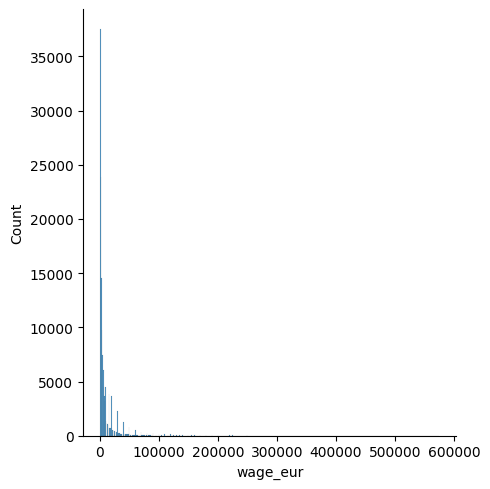

In [8]:
sns.displot(df['wage_eur'])

<Axes: >

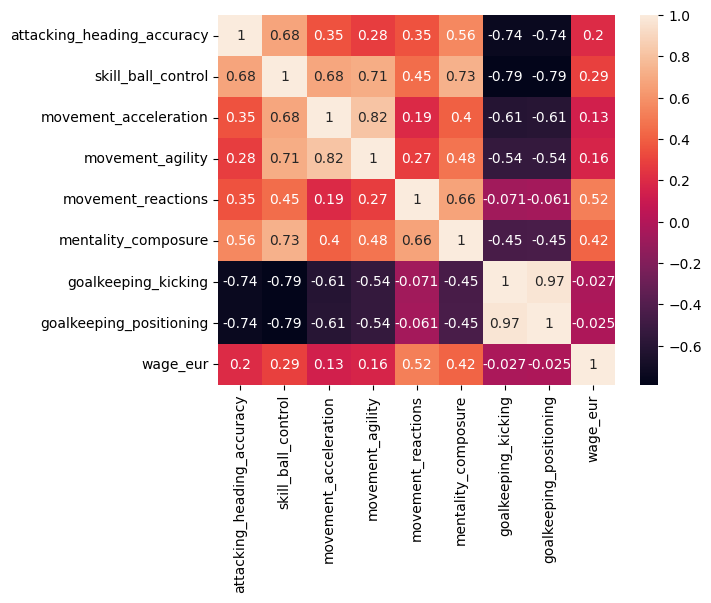

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
df.columns

Index(['attacking_heading_accuracy', 'skill_ball_control',
       'movement_acceleration', 'movement_agility', 'movement_reactions',
       'mentality_composure', 'goalkeeping_kicking', 'goalkeeping_positioning',
       'wage_eur'],
      dtype='object')

In [11]:
X = df[['attacking_heading_accuracy', 'skill_ball_control','movement_acceleration', 
        'movement_agility', 'movement_reactions','mentality_composure', 
        'goalkeeping_kicking', 'goalkeeping_positioning']]
y = df['wage_eur']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

In [14]:
from sklearn import linear_model

In [15]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
print(lm.intercept_)
print(lm.coef_)

-79956.10156132038
[ 103.99666932  297.29158463  128.99546048 -109.73829626  757.0446888
  213.40214602  247.23529839  159.64191679]


In [17]:
X_train.columns

Index(['attacking_heading_accuracy', 'skill_ball_control',
       'movement_acceleration', 'movement_agility', 'movement_reactions',
       'mentality_composure', 'goalkeeping_kicking',
       'goalkeeping_positioning'],
      dtype='object')

In [18]:
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coeff'])
cdf

,Coeff
attacking_heading_accuracy,103.996669
skill_ball_control,297.291585
movement_acceleration,128.995460
movement_agility,-109.738296
movement_reactions,757.044689
mentality_composure,213.402146
goalkeeping_kicking,247.235298
goalkeeping_positioning,159.641917


# Prediction

In [19]:
predictions = lm.predict(X_test)

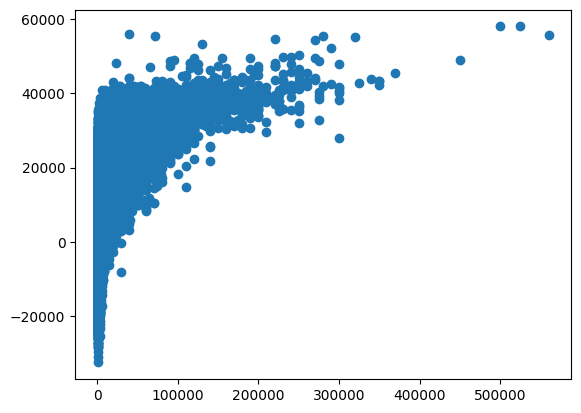

In [20]:
plt.scatter(y_test, predictions)

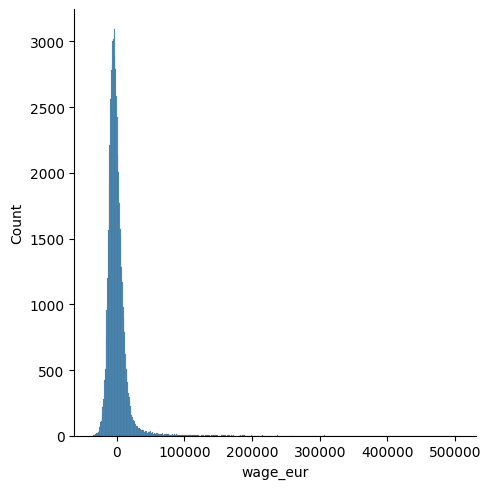

In [21]:
sns.displot((y_test-predictions))

In [23]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(metrics.r2_score(y_test,predictions))

9216.880354217881
283885916.2454912
283885916.2454912
0.3065177952199497


In [26]:
# save the model to disk
import pickle
pickle.dump(lm, open('model/model_1.pickle', 'wb'))